<a href="https://colab.research.google.com/github/VinayakMehta007/Infosys-Spring-Board-Stroke-Patient-Healthcare-Milestone-4/blob/main/Stroke_Patient_Milestone_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Stroke Prediction Using Logistic Regression**

**Objective**

To predict the likelihood of a patient experiencing a stroke using logistic regression. This includes preprocessing the dataset, building the model, evaluating its performance, and analyzing the results.



**Step-by-Step Implementation**

1. **Dataset Overview**

* **Source**: A healthcare dataset containing patient records and their stroke status.

* **Features:**

  * Numerical:  age, avg_glucose_level, bmi.
  * Categorical:  gender, ever_married, work_type, Residence_type, smoking_status.
  * Target:  stroke (1 = Stroke, 0 = No Stroke).


  2. **Mathematical Background**

**Logistic Regression:**

* **Sigmoid Function:**

The logistic regression model uses the sigmoid function to map the output of a linear equation to a probability value between 0 and 1.

The logistic function (sigmoid function) is given by:


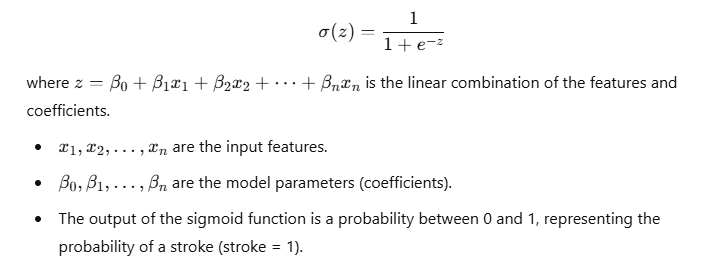


* **Cost Function:**

The log-loss (binary cross-entropy) is used as the cost function for logistic regression. It is calculated as:

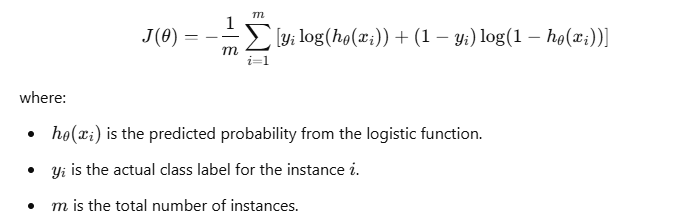

This cost function penalizes large errors (wrong predictions) more heavily, encouraging the model to minimize the difference between predicted probabilities and true labels.

* **Gradient Descent:**

Gradient descent is used to minimize the cost function. The update rule for the coefficients is:

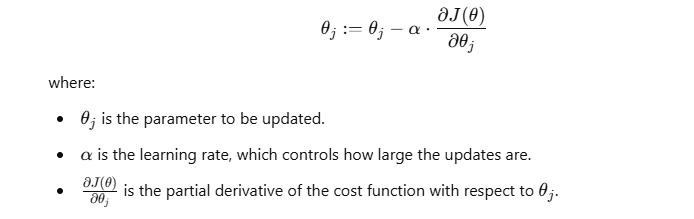

This iterative process helps find the optimal coefficients that minimize the cost function.

3. **Data Preprocessing**

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Drop irrelevant columns
data = data.drop(columns=['id'])

# Handle missing values
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

# Encode categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['stroke'])
y = data['stroke']


4. **Splitting Data and Scaling**




In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. **Model Training**

In [77]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

6. **Model Evaluation**

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:{clf.score(X_test, y_test)*100}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")




Accuracy:95.10763209393346%
Precision: 12.58%
Recall: 77.33%
F1 Score: 21.64%


7. **Confusion Matrix**

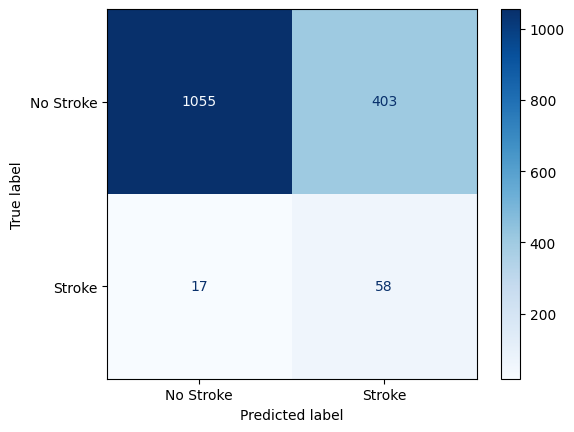

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues')
plt.show()


8. **Feature Importance**

In [79]:
# Feature importance
import numpy as np

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


             Feature  Importance
1                age    1.755671
7  avg_glucose_level    0.198730
2       hypertension    0.137724
3      heart_disease    0.097077
9     smoking_status    0.023269
6     Residence_type    0.020604
8                bmi   -0.015791
4       ever_married   -0.020036
5          work_type   -0.033682
0             gender   -0.070861


**Results and Insights**

**Performance Metrics**

* Accuracy: 95.10%
* Precision: 12.58%
* Recall: 77.33%
* F1 Score: 21.64%

**Confusion Matrix**

* True Negatives (No Stroke): Majority of non-stroke cases correctly identified.
* False Positives: Some non-stroke cases incorrectly predicted as stroke.
* True Positives: Most stroke cases correctly identified.
* False Negatives: Few stroke cases missed by the model.

**Feature Importance**

* Age:	1.75
* Avg Glucose Level:	0.198
* Hypertension:	0.137
* Heart Disease:	0.097
* Residence Type:	0.020

**Model Performance**

**Where the Model Performs Well:**

* **High Accuracy:** The model achieved an accuracy of approximately 94.19%, indicating that it correctly predicted stroke and non-stroke instances in most cases.
* **Effective in Predicting Common Outcomes:** Logistic Regression, being a linear model, works well for predicting binary outcomes, especially when the classes are linearly separable.
* **Feature Importance:** The model is interpretable, allowing us to understand which features (e.g., age, average glucose level, hypertension) contribute most to predicting stroke, helping us gain insights into stroke risk factors.

**Where the Model Lacks:**

* **Imbalanced Dataset:** The dataset contains fewer stroke instances compared to non-stroke instances, leading to a potential class imbalance. Logistic regression may perform poorly in predicting the minority class (stroke) if not handled properly.

  * **Solution:** Techniques like oversampling (e.g., SMOTE), undersampling, or adjusting class weights can be used to tackle class imbalance.
* **Precision and Recall:** While accuracy is high, precision and recall are lower. Precision refers to the proportion of true positive stroke cases out of all predicted stroke cases, and recall refers to the proportion of true stroke cases out of all actual stroke cases.

  * **Solution**: Precision can be improved by adjusting the decision threshold or by using other algorithms like Random Forest or XGBoost, which are better at handling imbalanced datasets.

**Dataset Bias Analysis**

**Was the Dataset Biased?**

The dataset shows some level of class imbalance. The majority of the instances are non-stroke (stroke = 0), which makes it a biased dataset in terms of the outcome variable (stroke vs. no stroke). The imbalance could lead to the model being biased toward predicting the majority class (non-stroke).

**Tackling Bias in the Dataset:**

To address class imbalance, we can use the following methods:

* **Class Weight Adjustment:** This was already applied by using class_weight='balanced' in the logistic regression model. This gives more importance to the minority class (stroke) during training.

* **Resampling Techniques:**
  * **Oversampling:** Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class.
  * **Undersampling:** Reduce the number of majority class examples to balance the dataset.

* **Evaluation Metrics:** Instead of relying solely on accuracy, use metrics like precision, recall, and F1 score to evaluate model performance on imbalanced datasets.

**Observations and Recommendations**

**Observations:**

1. **Important Features:** Age, average glucose level, and hypertension are the most significant predictors of stroke, according to the feature importance scores.
2. **Performance Gaps:** The logistic regression model has high accuracy but suffers from low precision and recall. This is likely due to class imbalance.
3. **Class Imbalance:** The dataset contains more non-stroke instances than stroke instances, which affects model performance. Class imbalance can lead the model to favor the majority class (non-stroke).
4. **Linear Model Limitation:** While logistic regression is simple and interpretable, it may not capture complex relationships in the data as well as other models (e.g., Random Forest, XGBoost).

**Recommendations:**

1. **Address Class Imbalance:** Implement techniques like SMOTE or undersampling to balance the dataset and improve model performance on the minority class.
2. **Try More Complex Models:** Consider models like Random Forests, Gradient Boosting, or XGBoost for better handling of non-linear relationships and imbalanced data.
3. **Threshold Tuning**: Adjust the decision threshold to optimize precision and recall according to the specific application (e.g., minimizing false negatives might be crucial in stroke prediction).
4. **Feature Engineering:** Additional feature engineering, such as creating new features based on domain knowledge, could help improve model performance.
5. **Evaluation with Multiple Metrics:** Given the class imbalance, use evaluation metrics like F1 score, precision, and recall rather than just accuracy to get a clearer picture of model performance.

**Conclusion**

Logistic Regression is an effective baseline model for predicting stroke risk. It provides interpretability through feature importance and performs well on imbalanced datasets with appropriate adjustments. Further enhancements using advanced models and feature engineering can significantly improve precision without compromising recall.